In [49]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.api import add_constant
from statsmodels.formula.api import ols

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# State Business question:

Imagine that we are a firm of data scientists/analysts employed by a company that owns a chain of supermarket stores across states in the US. Our consulting firm has been hired to conduct a survey on consumers' perception of cereals brands stocked by the supermarket; the goal is to identify what informs customers' decision for picking a particular brand as a healthier option.  We have been asked to examine which nutrients consumers considered more important when selecting a healthy cereal brand. If successful, our analysis will help the company decide on key improvements on popular cereal brands. 

In [50]:
# upload data as csv.file 

cereal_df = pd.read_csv('Cereals.csv')

In [51]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [52]:
cereal_df.shape

(77, 16)

In [53]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [54]:
# introduce dataset

cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


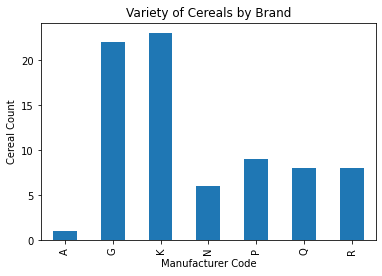

In [55]:
#Visualize the variety of cereals by brand
df=cereal_df[['mfr','calories']]
ax = df.groupby('mfr').count().plot(kind='bar', title='Variety of Cereals by Brand', legend=False, 
                                    xlabel='Manufacturer Code', ylabel='Cereal Count')

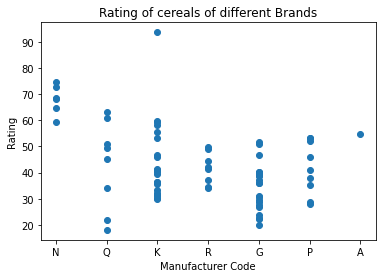

In [56]:
#Visualize rating of cereals of different brands
plt.scatter(cereal_df['mfr'], cereal_df['rating'])
plt.title('Rating of cereals of different Brands')
plt.xlabel("Manufacturer Code")
plt.ylabel("Rating")
plt.show()

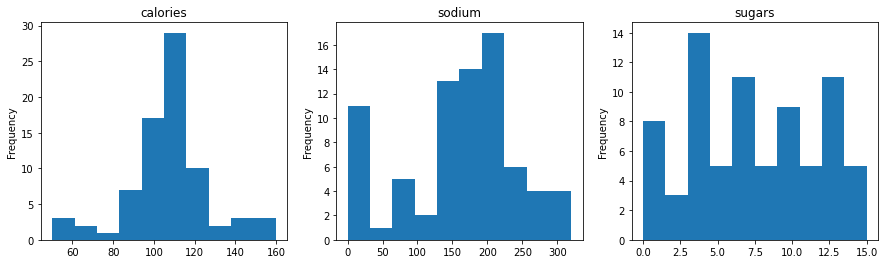

In [57]:
#Histogram of calories, sodium, and sugars in cereals
df1 = cereal_df[['calories','sodium', 'sugars']] 
fig, axes = plt.subplots(ncols=len(df1.columns), figsize=(15,4))
for col, ax in zip(df1, axes):
    df1[col].sort_index().plot.hist(ax=ax, title=col)
plt.show()

In [58]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


<AxesSubplot:>

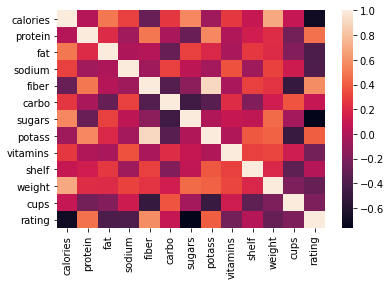

In [87]:
corr = cereal_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

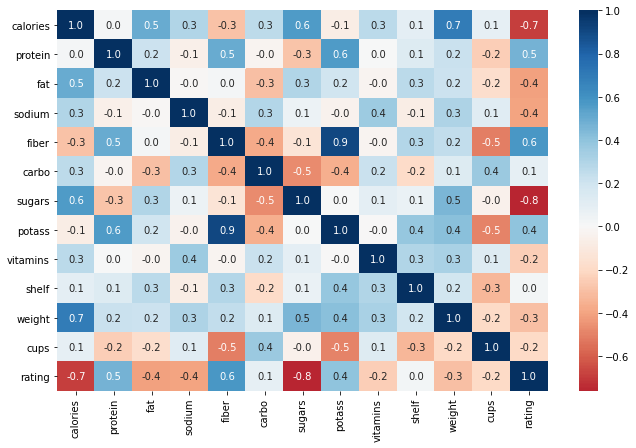

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [61]:
# Data pre-processing and cleaning
cereal_df = cereal_df.rename(columns={'type': 'type_cereal'})       #changes column name 'type' to 'type_cereal'
cereal_df.columns

Index(['name', 'mfr', 'type_cereal', 'calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight',
       'cups', 'rating'],
      dtype='object')

In [62]:
cereal_df.isna().sum()                                    #checking for missing values

name           0
mfr            0
type_cereal    0
calories       0
protein        0
fat            0
sodium         0
fiber          0
carbo          1
sugars         1
potass         2
vitamins       0
shelf          0
weight         0
cups           0
rating         0
dtype: int64

In [63]:
# remove rows with missing values 
reduced_df = cereal_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  74


In [64]:
mediancarbo = cereal_df['carbo'].median()
cereal_df.carbo = cereal_df.carbo.fillna(value=mediancarbo)
print('Number of rows with valid carbo values after filling NA values: ',
      cereal_df['carbo'].count())

Number of rows with valid carbo values after filling NA values:  77


In [65]:
mediansugars = cereal_df['sugars'].median()
cereal_df.sugars = cereal_df.sugars.fillna(value=mediansugars)
print('Number of rows with valid sugars values after filling NA values: ',
      cereal_df['sugars'].count())

Number of rows with valid sugars values after filling NA values:  77


In [66]:
medianpotass = cereal_df['potass'].median()
cereal_df.potass = cereal_df.potass.fillna(value=medianpotass)
print('Number of rows with valid potass values after filling NA values: ',
      cereal_df['potass'].count())

Number of rows with valid potass values after filling NA values:  77


In [67]:
cereal_df.isna().sum()   

name           0
mfr            0
type_cereal    0
calories       0
protein        0
fat            0
sodium         0
fiber          0
carbo          0
sugars         0
potass         0
vitamins       0
shelf          0
weight         0
cups           0
rating         0
dtype: int64

In [68]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.798701,7.025974,98.441558,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881688,4.349755,69.491857,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [69]:
#Run linear Regression Analysis

predictors = ['type_cereal','calories','protein','fat','sodium','fiber','carbo', 
              'sugars','potass', 'vitamins', 'shelf','weight','cups']
outcome = 'rating'

# partition data
X = pd.get_dummies(cereal_df[predictors], drop_first=True)
y = cereal_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) #X_train, X_test, y_train, y_test

cereal_lm = LinearRegression()
cereal_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', cereal_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': cereal_lm.coef_}))

# print performance measures
regressionSummary(train_y, cereal_lm.predict(train_X))

intercept  55.25920513805871
        Predictor  coefficient
0        calories    -0.234896
1         protein     3.246129
2             fat    -1.529479
3          sodium    -0.053457
4           fiber     3.410143
5           carbo     1.141856
6          sugars    -0.679514
7          potass    -0.032548
8        vitamins    -0.052339
9           shelf     0.076322
10         weight    -0.347219
11           cups    -0.166113
12  type_cereal_H     3.203276

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.4295
            Mean Absolute Error (MAE) : 0.1795
          Mean Percentage Error (MPE) : -0.0193
Mean Absolute Percentage Error (MAPE) : 0.5000


In [70]:
## train model r2 sqaure
pred_y = cereal_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, cereal_lm))
print('AIC : ', AIC_score(train_y, pred_y, cereal_lm))
print('BIC : ', BIC_score(train_y, pred_y, cereal_lm))


adjusted r2 :  0.9988717198409025
AIC :  82.78601729804262
BIC :  110.21563824537904


In [71]:
## test model r2 square
pred_y = cereal_lm.predict(valid_X)

normal_reg_r2=adjusted_r2_score(valid_y, pred_y, cereal_lm)
from sklearn.metrics import mean_squared_error
rmse_normal = mean_squared_error(valid_y,pred_y, squared=False)
print(rmse_normal)

print('adjusted r2 : ', adjusted_r2_score(valid_y, pred_y, cereal_lm))
print('AIC : ', AIC_score(valid_y, pred_y, cereal_lm))
print('BIC : ', BIC_score(valid_y, pred_y, cereal_lm))

2.6419902713234342
adjusted r2 :  0.9134975841797418
AIC :  178.20920553293976
BIC :  199.71901360021695


# Backward elimination

In [72]:

def train_model(variables):
    model = LinearRegression()
    model.fit(valid_X[variables], valid_y)
    return model

def score_model(model, variables):
    return AIC_score(valid_y, model.predict(valid_X[variables]), model)

## this is for training set
best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)





Variables: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, type_cereal_H
Start: score=104.41
Step: score=102.95, remove cups
Step: score=101.86, remove weight
Step: score=100.62, remove shelf
Step: score=99.41, remove potass
Step: score=99.41, remove None
['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'vitamins', 'type_cereal_H']


In [73]:
print('adjusted r2 for Backward Selection : ', adjusted_r2_score(valid_y, best_model.predict(valid_X[best_variables]), best_model))

backward_reg_r2=adjusted_r2_score(valid_y, best_model.predict(valid_X[best_variables]), best_model)

adjusted r2 for Backward Selection :  0.9928646416221419


## using sequentialFeatureselector which automatically selects the best features bases on their r2 score. it takes range of features and gives out the best feature set

## Here, on the y-axis, the performance label indicates the R-squared values for the different numbers of features.

best_Features ('calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'type_cereal_H')


C:\Users\harin\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\harin\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


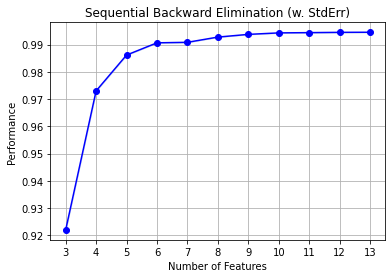

In [74]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(), k_features=(3,X.shape[1]),forward=False,floating=False,scoring = 'r2',cv = 0)



sfs.fit(X,y)
print("best_Features",sfs.k_feature_names_)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()


In [75]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.8434
            Mean Absolute Error (MAE) : 0.6229
          Mean Percentage Error (MPE) : -0.0490
Mean Absolute Percentage Error (MAPE) : 1.4920


In [76]:
from sklearn.metrics import mean_squared_error
rmse_backward = mean_squared_error(valid_y, best_model.predict(valid_X[best_variables]), squared=False)


# Forward Selection

In [77]:
#Forward selection
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)



Variables: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, type_cereal_H
Start: score=384.67, constant
Step: score=343.01, add sugars
Step: score=300.91, add fiber
Step: score=263.41, add sodium
Step: score=213.69, add fat
Step: score=171.67, add protein
Step: score=159.85, add vitamins
Step: score=153.36, add potass
Step: score=150.95, add carbo
Step: score=104.21, add calories
Step: score=77.78, add type_cereal_H
Step: score=77.78, add None
['sugars', 'fiber', 'sodium', 'fat', 'protein', 'vitamins', 'potass', 'carbo', 'calories', 'type_cereal_H']


best_Features ('calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'type_cereal_H')


C:\Users\harin\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\harin\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


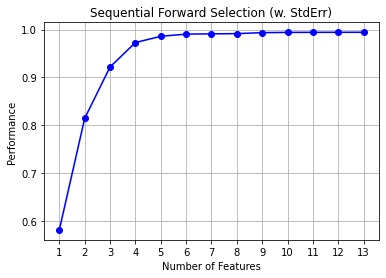

In [78]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(), k_features=(3,X.shape[1]),forward=True,floating=False,scoring = 'r2',cv = 0)



sfs.fit(X,y)
print("best_Features",sfs.k_feature_names_)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [79]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))
from sklearn.metrics import mean_squared_error
rmse_forward = mean_squared_error(valid_y, best_model.predict(valid_X[best_variables]), squared=False)


Regression statistics

                      Mean Error (ME) : -0.6297
       Root Mean Squared Error (RMSE) : 2.6366
            Mean Absolute Error (MAE) : 0.7016
          Mean Percentage Error (MPE) : -1.3218
Mean Absolute Percentage Error (MAPE) : 1.4590


In [80]:
print('adjusted r2 for Forward Selection : ', adjusted_r2_score(valid_y, best_model.predict(valid_X[best_variables]), best_model))
forward_reg_r2=adjusted_r2_score(valid_y, best_model.predict(valid_X[best_variables]), best_model)

adjusted r2 for Forward Selection :  0.9267731234224206


In [81]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, type_cereal_H
Start: score=384.67, constant
Step: score=343.01, add sugars
Step: score=300.91, add fiber
Step: score=263.41, add sodium
Step: score=213.69, add fat
Step: score=171.67, add protein
Step: score=159.85, add vitamins
Step: score=153.36, add potass
Step: score=150.95, add carbo
Step: score=104.21, add calories
Step: score=77.78, add type_cereal_H
Step: score=77.78, unchanged None
['sugars', 'fiber', 'sodium', 'fat', 'protein', 'vitamins', 'potass', 'carbo', 'calories', 'type_cereal_H']


In [82]:
print('adjusted r2 for Stepwise Selection : ', adjusted_r2_score(valid_y, best_model.predict(valid_X[best_variables]), best_model))

adjusted r2 for Stepwise Selection :  0.9267731234224206


In [83]:
#Lasso regularized method
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

lasso_cv = LassoCV(normalize=True, cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)
print(adjusted_r2_score(valid_y,lasso_cv.predict(valid_X),lasso_cv))
lasso_reg_r2=adjusted_r2_score(valid_y,lasso_cv.predict(valid_X),lasso_cv)


Regression statistics

                      Mean Error (ME) : -1.5894
       Root Mean Squared Error (RMSE) : 8.5429
            Mean Absolute Error (MAE) : 7.0532
          Mean Percentage Error (MPE) : -10.8373
Mean Absolute Percentage Error (MAPE) : 20.2245

Regression statistics

                      Mean Error (ME) : -0.6829
       Root Mean Squared Error (RMSE) : 2.5363
            Mean Absolute Error (MAE) : 0.7287
          Mean Percentage Error (MPE) : -1.4782
Mean Absolute Percentage Error (MAPE) : 1.5596
Lasso-CV chosen regularization:  0.001750305104252421
[-0.2237304   3.15826482 -1.66188385 -0.05349105  3.28032292  1.06678392
 -0.75175292 -0.02799235 -0.04974846  0.01829203 -0.         -0.03714834
  2.95831375]
0.9202825587599613


## Ideally, lower RMSE and higher R-squared values are indicative of a good model.

In [89]:
## From the three different approaches
results={'Normal Regression':normal_reg_r2,'Backward Selection':backward_reg_r2,'Forward Selection':forward_reg_r2,'Lasso penalty Regression':lasso_reg_r2}
results_df=pd.DataFrame(list(results.items()))

results_df.columns=['Methods','R2 Square']
results_df



,Methods,R2 Square
0,Normal Regression,0.913498
1,Backward Selection,0.992865
2,Forward Selection,0.926773
3,Lasso penalty Regression,0.920283


<AxesSubplot:>

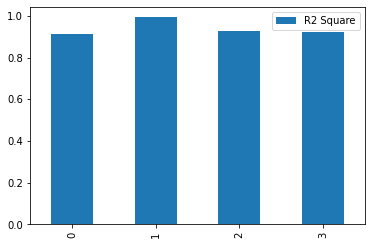

In [90]:
results_df.plot(kind="bar")

## After training model on different methods , we came to conclusion that based on r2 square value both backward and forward selection features gave the same results with a great r2 square value of 0.992865

## backward selection had 9 features that contributes best to the predicting the rating,